In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as ml
import matplotlib.pyplot as plt
%matplotlib inline
ml.style.use('fivethirtyeight')
sns.set_style('ticks')

In [2]:
test_results = pd.read_csv("/Users/nicholascalen/downloads/all_pred (2).csv")
global_pth = '/Users/nicholascalen/fnc-1/'
pth_to_bodies = global_pth + 'competition_test_bodies.csv'
pth_to_headlines = global_pth + 'competition_test_stances.csv'
test_ids = pd.read_csv(pth_to_headlines)['Body ID']

In [14]:
test_results['Body ID'] = test_ids 
submission = test_results.copy()[['Headline','Body ID', 'all_pred' ]]
submission.columns = ['Headline','Body ID', 'Stance' ]
#test_results[['Headline','Body ID', 'Stance' ]]

In [16]:
submission.to_csv('submission.csv',index=False)

In [3]:
target_names = ['related', 'unrelated']
import matplotlib.colors as mcolors
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

sns.set_palette(five_thirty_eight)
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
cmap = mcolors.ListedColormap(plt.rcParams['axes.prop_cycle'].by_key()['color'])
def classification_interpretation(y_pred, y_actual): 

    cf_matrix = confusion_matrix(y_actual, y_pred, labels=target_names)
    accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
    stats_text = "\n\nAccuracy={:0.3f}".format(accuracy*100)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.set_palette(five_thirty_eight)
    sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
    sns.set_style('ticks')
    sns.heatmap(cf_matrix, 
                xticklabels=target_names, 
                yticklabels=target_names, annot=labels, fmt='',cmap=five_thirty_eight[::-1],  linewidths=10)
    plt.xlabel(stats_text)    
def  make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy*100)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False
    fig = plt.figure(figsize=figsize)
    gs0 = ml.gridspec.GridSpec(1,2, width_ratios=[20,2], hspace=0.05)
    gs00 = ml.gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gs0[1], hspace=0)

    ax = fig.add_subplot(gs0[0])
#     cax1 = fig.add_subplot(gs00[0])
#     cax2 = fig.add_subplot(gs00[1])
    off_diag_mask = np.eye(*cf.shape, dtype=bool)
    vmin = np.min(cf)
    vmax = np.max(cf)
    # MAKE THE HEATMAP VISUALIZATION
    #plt.figure(figsize=figsize)
#     sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    sns.heatmap(cf, annot=box_labels,fmt='', mask=~off_diag_mask, cbar=False, cmap=[cmap[0]], vmin=vmin, vmax=vmax, ax=ax, cbar_ax=None)
    sns.heatmap(cf, annot=box_labels,fmt='', xticklabels=categories,yticklabels=categories , cbar=False,
                mask=off_diag_mask, cmap=[cmap[4]], vmin=vmin, vmax=vmax, ax=ax, cbar_ax=None, cbar_kws=dict(ticks=[]))
    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

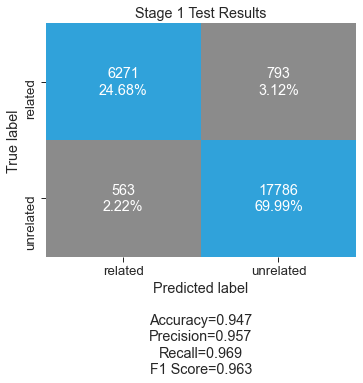

In [182]:
cf_matrix = confusion_matrix(test_results.target_stage1, test_results.pred)
make_confusion_matrix(cf_matrix, cmap=five_thirty_eight, title='Stage 1 Test Results',
                      categories =test_results.target_stage1.unique().tolist()[::-1])
plt.savefig('img/cf_1.png', dpi=200, bbox_inches ='tight',transparent=True)

In [168]:
print(classification_report(test_results.target_stage1, test_results.pred, target_names=target_names))

              precision    recall  f1-score   support

     related       0.92      0.89      0.90      7064
   unrelated       0.96      0.97      0.96     18349

    accuracy                           0.95     25413
   macro avg       0.94      0.93      0.93     25413
weighted avg       0.95      0.95      0.95     25413



In [188]:
random.shuffle(five_thirty_eight)
five_thirty_eight

['#6d904f', '#30a2da', '#8b8b8b', '#e5ae38', '#fc4f30']

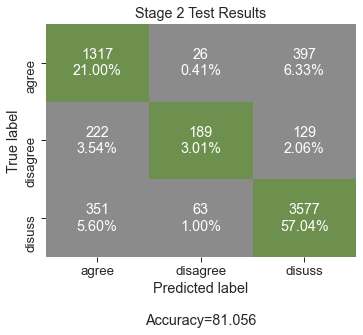

In [194]:
import random 
random.shuffle(five_thirty_eight)

stg2_results = test_results.loc[(test_results.target_stage1 == test_results.pred) & (test_results.pred == "related")]
cf_matrix = confusion_matrix(stg2_results.labels, stg2_results.stg2_preds)
make_confusion_matrix(cf_matrix, cmap=five_thirty_eight,title='Stage 2 Test Results',
                      categories = ['agree','disagree','disuss'])
plt.savefig('img/cf_2.png', dpi=200, bbox_inches ='tight',transparent=True)

In [170]:
print(classification_report(stg2_results.labels, 
                            stg2_results.stg2_preds, 
                            target_names=['agree',  'disagree', 'discuss']))

              precision    recall  f1-score   support

       agree       0.70      0.76      0.73      1740
    disagree       0.68      0.35      0.46       540
     discuss       0.87      0.90      0.88      3991

    accuracy                           0.81      6271
   macro avg       0.75      0.67      0.69      6271
weighted avg       0.81      0.81      0.80      6271



In [6]:
cats = ['agree','disagree' ,  'discuss','unrelated']
import random

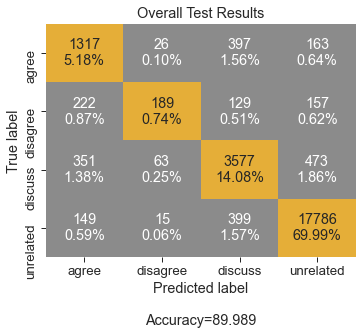

In [9]:
random.shuffle(five_thirty_eight)
cf_matrix = confusion_matrix(test_results.Stance, test_results.all_pred)
make_confusion_matrix(cf_matrix, cmap=five_thirty_eight,title='Overall Test Results',
                 
                      
                      categories =cats)
plt.savefig('img/cf_3.png', dpi=200, bbox_inches ='tight',transparent=True)

In [173]:
print(classification_report(test_results.Stance, 
                            test_results.all_pred))

              precision    recall  f1-score   support

       agree       0.65      0.69      0.67      1903
    disagree       0.65      0.27      0.38       697
     discuss       0.79      0.80      0.80      4464
   unrelated       0.96      0.97      0.96     18349

    accuracy                           0.90     25413
   macro avg       0.76      0.68      0.70     25413
weighted avg       0.90      0.90      0.90     25413



In [174]:
cols=['agree','disagree','discuss','unrelated','accuracy']
display(pd.DataFrame(classification_report(test_results.Stance, 
                            test_results.all_pred, output_dict=True)).loc['recall'].to_frame().T[cols])

,agree,disagree,discuss,unrelated,accuracy
recall,0.692065,0.271162,0.801299,0.969317,0.899894


In [175]:
LABELS = ['agree', 'disagree', 'discuss', 'unrelated']
LABELS_RELATED = ['unrelated','related']
RELATED = LABELS[0:3]

def score_submission(gold_labels, test_labels):
    score = 0.0
    cm = [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]]

    for i, (g, t) in enumerate(zip(gold_labels, test_labels)):
        g_stance, t_stance = g, t
        if g_stance == t_stance:
            score += 0.25
            if g_stance != 'unrelated':
                score += 0.50
        if g_stance in RELATED and t_stance in RELATED:
            score += 0.25

        cm[LABELS.index(g_stance)][LABELS.index(t_stance)] += 1

    return score, cm


def print_confusion_matrix(cm):
    lines = []
    header = "|{:^11}|{:^11}|{:^11}|{:^11}|{:^11}|".format('', *LABELS)
    line_len = len(header)
    lines.append("-"*line_len)
    lines.append(header)
    lines.append("-"*line_len)

    hit = 0
    total = 0
    for i, row in enumerate(cm):
        hit += row[i]
        total += sum(row)
        lines.append("|{:^11}|{:^11}|{:^11}|{:^11}|{:^11}|".format(LABELS[i],
                                                                   *row))
        lines.append("-"*line_len)
    print('\n'.join(lines))


def report_score(actual,predicted):
    score,cm = score_submission(actual,predicted)
    best_score, _ = score_submission(actual,actual)

    print_confusion_matrix(cm)
    print("Score: " +str(score) + " out of " + str(best_score) + "\t("+str(score*100/best_score) + "%)")
    return score*100/best_score


if __name__ == "__main__":
    actual = [0,0,0,0,1,1,0,3,3]
    predicted = [0,0,0,0,1,1,2,3,3]
    report_score([x for x in test_results.Stance.tolist()],[x for x in test_results.all_pred.tolist()])

-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |   1317    |    26     |    397    |    163    |
-------------------------------------------------------------
| disagree  |    222    |    189    |    129    |    157    |
-------------------------------------------------------------
|  discuss  |    351    |    63     |   3577    |    473    |
-------------------------------------------------------------
| unrelated |    149    |    15     |    399    |   17786   |
-------------------------------------------------------------
Score: 9826.5 out of 11651.25	(84.33859028001288%)
